In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [93]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.1, random_state=0)

In [94]:
X.shape

(1000, 2)

In [95]:
len(X[y==0])

500

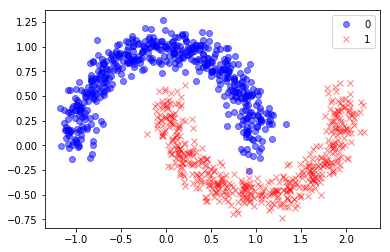

In [96]:
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [97]:
X.shape #1000 points and each of them as two features

(1000, 2)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [101]:
model = Sequential()

In [102]:
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [103]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [104]:
results = model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 266us/step


In [105]:
results
#results[0] is Binary_Crossentropy and results[1] is accuracy

[0.50334419687589, 0.6666666674613952]

In [106]:
results[1]

0.6666666674613952

In [107]:
print("The accuracy score is \t{:0.3f}".format(results[1]))
#Accuracy result is 83%

The accuracy score is 	0.667


In [108]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

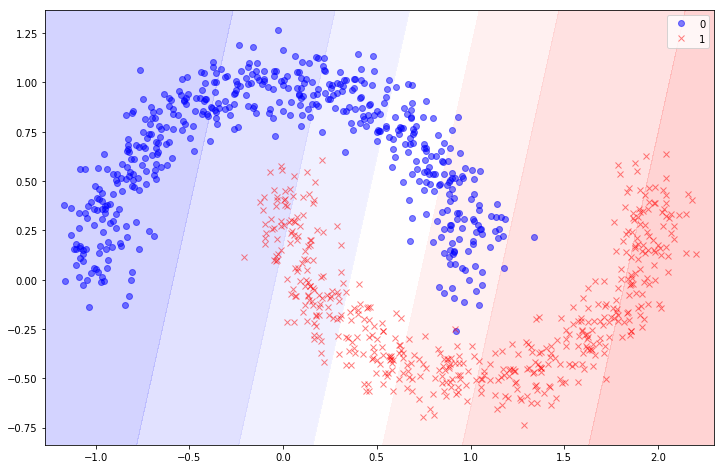

In [109]:
plot_decision_boundary(model, X, y)

# Deep Model

In [110]:
model = Sequential()

In [111]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [112]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
700/700 [==============================] - 0s 482us/step - loss: 0.4262 - acc: 0.7900
Epoch 2/20
700/700 [==============================] - 0s 24us/step - loss: 0.2827 - acc: 0.8886
Epoch 3/20
700/700 [==============================] - 0s 29us/step - loss: 0.2631 - acc: 0.8843
Epoch 4/20
700/700 [==============================] - 0s 39us/step - loss: 0.2546 - acc: 0.8857
Epoch 5/20
700/700 [==============================] - 0s 31us/step - loss: 0.2513 - acc: 0.8857
Epoch 6/20
700/700 [==============================] - 0s 36us/step - loss: 0.2371 - acc: 0.8914
Epoch 7/20
700/700 [==============================] - 0s 26us/step - loss: 0.2131 - acc: 0.9100
Epoch 8/20
700/700 [==============================] - 0s 31us/step - loss: 0.1273 - acc: 0.9586
Epoch 9/20
700/700 [==============================] - 0s 35us/step - loss: 0.1191 - acc: 0.9529
Epoch 10/20
700/700 [==============================] - 0s 33us/step - loss: 0.0494 - acc: 0.9886
Epoch 11/20
700/700 [=================

In [113]:
result = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 313us/step


In [114]:
result

[0.04717022826274236, 0.98]

In [115]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(result[1]))

The Accuracy score on the Train set is:	0.980


In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [117]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.986
The Accuracy score on the Test set is:	0.980


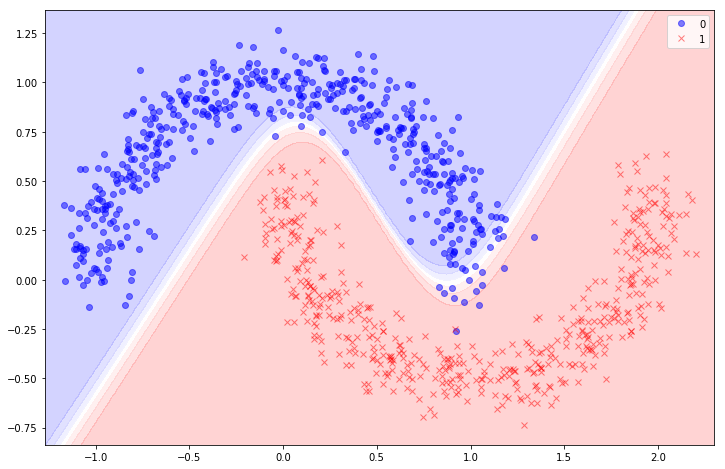

In [118]:
plot_decision_boundary(model, X, y)